In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
df_cat_var = pd.read_csv('carprices.csv')
df_cat_var

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


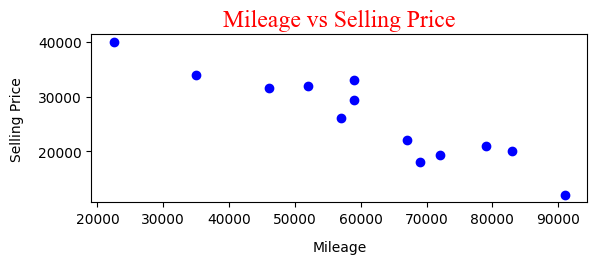

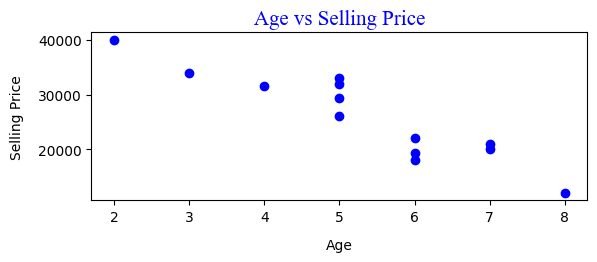

,Mileage,Sell Price($),Age(yrs)
Mileage,1.000000,-0.927116,0.993452
Sell Price($),-0.927116,1.000000,-0.921741
Age(yrs),0.993452,-0.921741,1.000000


In [3]:
plt.subplot(2,1,1)
plt.plot(df_cat_var.Mileage,df_cat_var[['Sell Price($)']],'ob' )
fontdict = {'color':'red','fontsize':17,'family':'times new roman'}
plt.xlabel('Mileage',labelpad=10)
plt.ylabel('Selling Price',labelpad=10)
plt.title('Mileage vs Selling Price',fontdict=fontdict)
plt.show()
plt.subplot(2,1,2)
plt.plot(df_cat_var['Age(yrs)'],df_cat_var[['Sell Price($)']],'ob' )
fontdict = {'color':'blue','fontsize':15,'family':'times new roman'}
plt.xlabel('Age',labelpad=10)
plt.ylabel('Selling Price',labelpad=10)
plt.title('Age vs Selling Price',fontdict=fontdict)
plt.show()
df_cat_var.corr(numeric_only= True)
#As we can see here Age and Mileage has very high correlation with correlation coefficient of 0.993452. 
#We can avoid any one variable.

### Categorical Variables to Numbers
-> As we cannot use categorical variables in our Linear Regression model, we have to convert the categorical variable to numbers. We have 2 ways for that 1. pd.get_dummies() 2.labelencoder and then onehotencoder from sklearn.preprocessing.


### way 1 refer pd.get_dummies() method in pandas methods

In [4]:
new_df_cat_var = pd.get_dummies(data=df_cat_var,columns=['Car Model'],drop_first=True)
#dropped the first column of dummy encoded variables 
# dropping age variable 
new_df_cat_var = new_df_cat_var.drop(columns=['Age(yrs)'])

In [5]:
X = new_df_cat_var.drop(columns=['Sell Price($)'])
print(X)
y= new_df_cat_var['Sell Price($)']
print()
print(y)
L_Reg = LinearRegression()
L_Reg.fit(X.values,y)

    Mileage  Car Model_BMW X5  Car Model_Mercedez Benz C class
0     69000                 1                                0
1     35000                 1                                0
2     57000                 1                                0
3     22500                 1                                0
4     46000                 1                                0
5     59000                 0                                0
6     52000                 0                                0
7     72000                 0                                0
8     91000                 0                                0
9     67000                 0                                1
10    83000                 0                                1
11    79000                 0                                1
12    59000                 0                                1

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     220

LinearRegression()

In [6]:
# 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

# 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

# 3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())
print('predicted price of benz with 45000 mileage',L_Reg.predict([[45000,0,1]]))

predicted price of benz with 45000 mileage [37033.10879215]


In [7]:
new_df_cat_var = pd.get_dummies(data=df_cat_var,columns=['Car Model'],drop_first=True)
X = new_df_cat_var.drop(columns=['Sell Price($)'])
print(X)
y= new_df_cat_var['Sell Price($)']
print()
print(y)
L_Reg.fit(X.values,y)
print()
print('predicted price of benz with 45000 mileage and age of 4 yrs',L_Reg.predict([[45000,4,0,1]]))

    Mileage  Age(yrs)  Car Model_BMW X5  Car Model_Mercedez Benz C class
0     69000         6                 1                                0
1     35000         3                 1                                0
2     57000         5                 1                                0
3     22500         2                 1                                0
4     46000         4                 1                                0
5     59000         5                 0                                0
6     52000         5                 0                                0
7     72000         6                 0                                0
8     91000         8                 0                                0
9     67000         6                 0                                1
10    83000         7                 0                                1
11    79000         7                 0                                1
12    59000         5                 0            

In [8]:
print('predicted price of BMW with 86000 mileage and age of 7 yrs',L_Reg.predict([[86000,7,1,0]]))
print('Our model accuracy: ',L_Reg.score(X.values,y)*100,'%')

predicted price of BMW with 86000 mileage and age of 7 yrs [11080.74313219]
Our model accuracy:  94.17050937281081 %


NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you

In [9]:
# label Encoding
le = LabelEncoder()
df_cat_var['Car Model'] = le.fit_transform(df_cat_var['Car Model'])
df_cat_var

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [10]:
#One Hot Encoding
y = df_cat_var['Sell Price($)']
x = df_cat_var.drop(columns=['Sell Price($)'])
ohe = OneHotEncoder()
ohe_col = pd.DataFrame(ohe.fit_transform(df_cat_var[['Car Model']]).toarray(),columns=['Audi','BMW','Mercedes'])
print(ohe_col)
x = pd.concat([x,ohe_col],axis='columns')

    Audi  BMW  Mercedes
0    0.0  1.0       0.0
1    0.0  1.0       0.0
2    0.0  1.0       0.0
3    0.0  1.0       0.0
4    0.0  1.0       0.0
5    1.0  0.0       0.0
6    1.0  0.0       0.0
7    1.0  0.0       0.0
8    1.0  0.0       0.0
9    0.0  0.0       1.0
10   0.0  0.0       1.0
11   0.0  0.0       1.0
12   0.0  0.0       1.0


In [11]:
# X = X.drop(columns=['Car Model'])
x = x.drop(columns=['Audi','Car Model'],errors='ignore')
x

,Mileage,Age(yrs),BMW,Mercedes
0,69000,6,1.0,0.0
1,35000,3,1.0,0.0
2,57000,5,1.0,0.0
3,22500,2,1.0,0.0
4,46000,4,1.0,0.0
5,59000,5,0.0,0.0
6,52000,5,0.0,0.0
7,72000,6,0.0,0.0
8,91000,8,0.0,0.0
9,67000,6,0.0,1.0


In [12]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [13]:
L_Reg.fit(X.values,y)
print(L_Reg.score(X.values,y))

0.9417050937281082


### Saving Models using pickle and joblib

In [16]:
# Saving Models
import pickle as pk
with open('model_pickle','wb') as pkf:
    pk.dump(L_Reg,pkf)

In [15]:
# opening saved model
with open('model_pickle','rb') as pkfr:
    modelpk= pk.load(pkfr)
modelpk.predict([[45000,4,0,1]])# 4 yr old mercedes with 45000 mileage

array([36991.31721061])

In [18]:
import joblib as jb
with open('model_joblib','wb') as jbf:
    jb.dump(L_Reg,jbf)

In [19]:
with open('model_pickle','rb') as jbfr:
    modeljb = jb.load(jbfr)
modeljb.predict([[45000,4,0,1]])# 4 yr old mercedes with 45000 mileage

array([36991.31721061])

### joblib vs pickle

joblib is faster in saving/loading large NumPy arrays, 
whereas pickle is faster with large collections of Python objects. 
Therefore, if your model contains large NumPy arrays (as the majority of models does), 
joblib should be faster